# Visualize data and basic image segmentation

In [1]:
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.misc
import cv2
from skimage import img_as_bool, io, color, morphology, segmentation
from skimage.morphology import binary_closing, binary_opening, disk, label

# import self-defined functions
from segmentationFunctions import *

In [2]:
files = os.listdir('../data/stage1_train/')

In [3]:
def checkPositiveStaining(originalImage):
    channel = cv2.cvtColor(originalImage, cv2.COLOR_RGB2GRAY)
    _, mask = cv2.threshold(channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    mask_original = fillHoles(deleteSmallObjects(mask, 2))
    mask_reverse = fillHoles(deleteSmallObjects(255 - mask, 2))
    if (np.max(skimage.measure.label(mask_original, background = 0)) < 
        np.max(skimage.measure.label(mask_reverse, background = 0))) or (np.sum(originalImage[:, :, 0]) > 1.5*np.sum(originalImage[:, :, 1])):
        return 255-channel
    else:
        return channel

## 1. One image as an example

In [25]:
i = 0
originalImageFile = os.listdir(os.path.join('../data/stage1_train', files[i], 'images'))
originalImage = cv2.imread(os.path.join('../data/stage1_train', files[i], 'images', originalImageFile[0]))

### Ground Truth

In [26]:
maskFiles = os.listdir(os.path.join('../data/stage1_train', files[i], 'masks'))
maskGT = np.zeros(np.shape(originalImage)[0:2])
for j in range(len(maskFiles)):
    maskGTj =  cv2.imread(os.path.join('../data/stage1_train', files[i], 'masks', maskFiles[j]))[:, :, 0]
    maskGT = np.logical_or(maskGT, maskGTj)

### Segmentation use Watershed

In [27]:
channel = checkPositiveStaining(originalImage)
mask1 = generateMask(channel, originalImg = originalImage, fillHole = False, normalizeImg = False, 
                     plotProcess = False, plotResult = False, title = "Channel", 
                     useWatershed=True)

/home/swan15/.local/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint8 to bool
  .format(dtypeobj_in, dtypeobj_out))


### Segmentation without Watershed

In [28]:
channel = checkPositiveStaining(originalImage)
mask2 = generateMask(channel, originalImg = originalImage, fillHole = False, normalizeImg = False, 
                     plotProcess = False, plotResult = False, title = "Channel", 
                     useWatershed = False)

### Compare three results

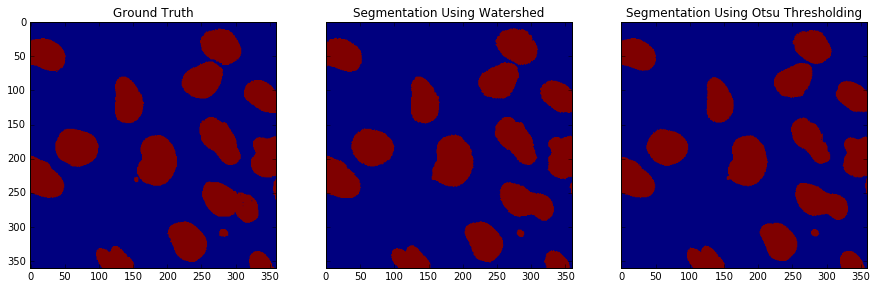

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()
ax[0].imshow(maskGT)
ax[0].set_title("Ground Truth")
ax[1].imshow(mask1)
ax[1].set_title("Segmentation Using Watershed")
ax[2].imshow(mask2)
ax[2].set_title("Segmentation Using Otsu Thresholding")
plt.show()

## 2. Compare results in selected samples

0
6bc8cda54f5b66a2a27d962ac219f8075bf7cc43b87ba0c9e776404370429e80
['6bc8cda54f5b66a2a27d962ac219f8075bf7cc43b87ba0c9e776404370429e80.png']


/home/swan15/.local/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint8 to bool
  .format(dtypeobj_in, dtypeobj_out))


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18.]


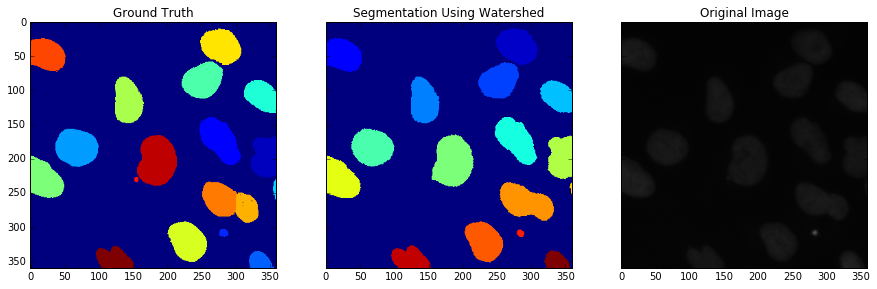

100
1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0
['1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0.png']
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]


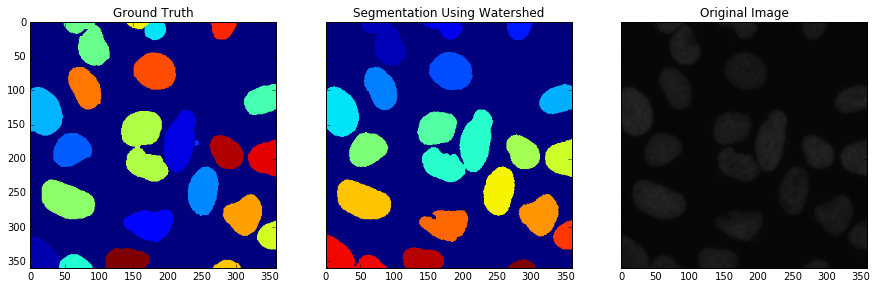

200
a6593632dcbbe4c9e9429a9cec573d26fd8c91a47d554d315f25e7c2e0280ee3
['a6593632dcbbe4c9e9429a9cec573d26fd8c91a47d554d315f25e7c2e0280ee3.png']
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


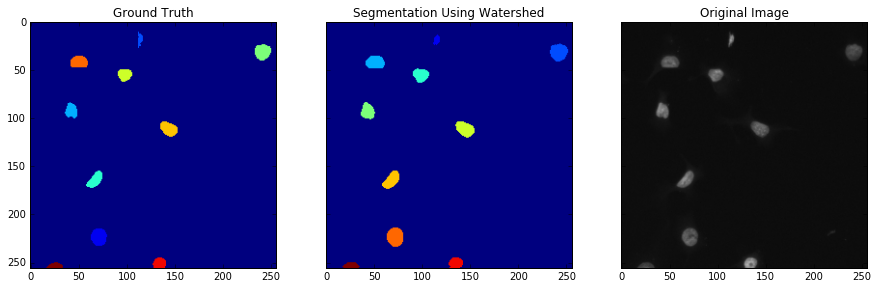

300
45cc00f2ef95da6698bf590663e319d7c0ed4fb99d42dd3cf4060887da74fb81
['45cc00f2ef95da6698bf590663e319d7c0ed4fb99d42dd3cf4060887da74fb81.png']
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


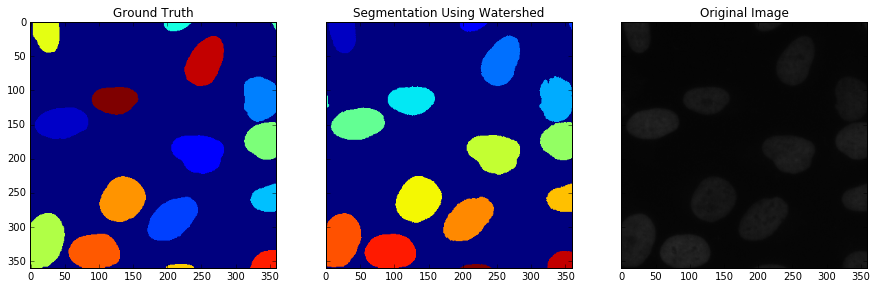

400
a022908f1b7880838dbc0411e50828e64b4f5e0263afdf04295e30bb2ff58005
['a022908f1b7880838dbc0411e50828e64b4f5e0263afdf04295e30bb2ff58005.png']
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42.]


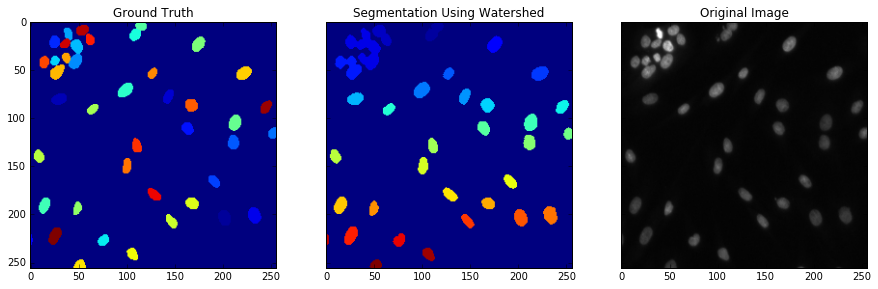

500
785555c0cbb49dad835635217085287a8cc61c27d26f0e106b70c1dfd05784dc
['785555c0cbb49dad835635217085287a8cc61c27d26f0e106b70c1dfd05784dc.png']
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


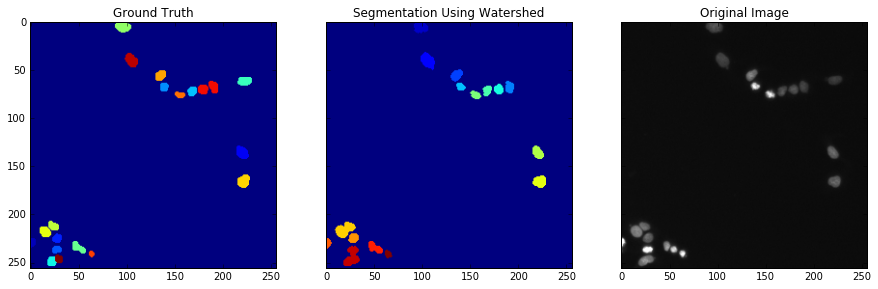

600
a31deaf0ac279d5f34fb2eca80cc2abce6ef30bd64e7aca40efe4b2ba8e9ad3d
['a31deaf0ac279d5f34fb2eca80cc2abce6ef30bd64e7aca40efe4b2ba8e9ad3d.png']
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87.]


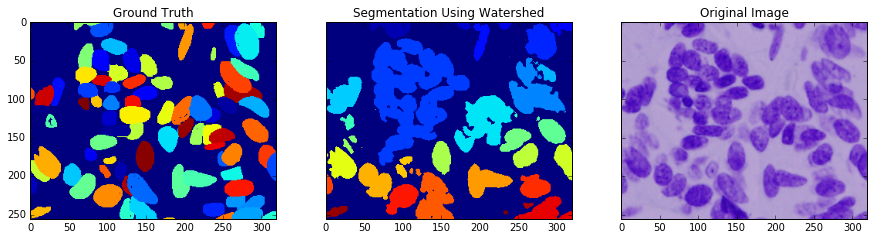

In [23]:
for i in range(len(files)):
    if i%100 == 0:
        originalImageFile = os.listdir(os.path.join('../data/stage1_train', files[i], 'images'))
        print(i)
        print(files[i])
        print(originalImageFile)
        originalImage = cv2.imread(os.path.join('../data/stage1_train', files[i], 'images', originalImageFile[0]))[:, :, (2,1,0)]

        maskFiles = os.listdir(os.path.join('../data/stage1_train', files[i], 'masks'))
        maskGT = np.zeros(np.shape(originalImage)[0:2])
        labelGT = np.zeros(np.shape(originalImage)[0:2])
        for j in range(len(maskFiles)):
            maskGTj =  cv2.imread(os.path.join('../data/stage1_train', files[i], 'masks', maskFiles[j]))[:, :, 0]
            maskGT = np.logical_or(maskGT, maskGTj)
            labelGT = labelGT + (maskGTj>0)*(j+1)
        
        channel = checkPositiveStaining(originalImage)
        mask2 = generateMask(channel, originalImg = originalImage, fillHole = False, normalizeImg = False, 
                         plotProcess = False, plotResult = False, title = "Channel", 
                         useWatershed = True)
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, subplot_kw={'adjustable': 'box-forced'})    
        ax = axes.ravel()
        print(np.unique(labelGT))
        ax[0].imshow(labelGT, cmap="jet")
        ax[0].set_title("Ground Truth")
        ax[1].imshow(skimage.measure.label(mask2), cmap="jet")
        ax[1].set_title("Segmentation Using Watershed")
        ax[2].imshow(originalImage)
        ax[2].set_title("Original Image")
        plt.show()

## 3. Compute output each test image (use RLE encoding)

In [115]:
test_dirs = os.listdir("./data/stage1_test")
test_filenames=["./data/stage1_test/"+file_id+"/images/"+file_id+".png" for file_id in test_dirs]
test_images=[cv2.imread(imagefile) for imagefile in test_filenames]

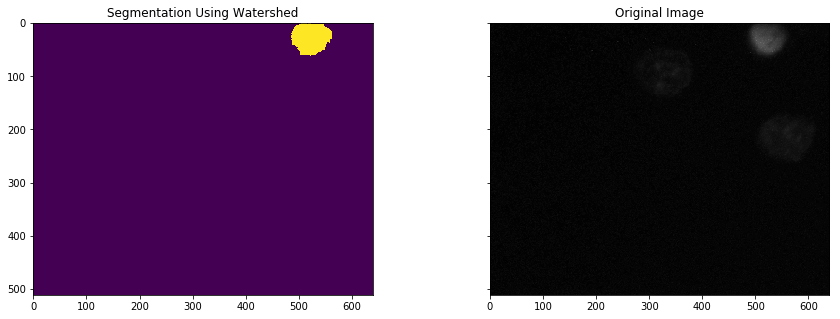

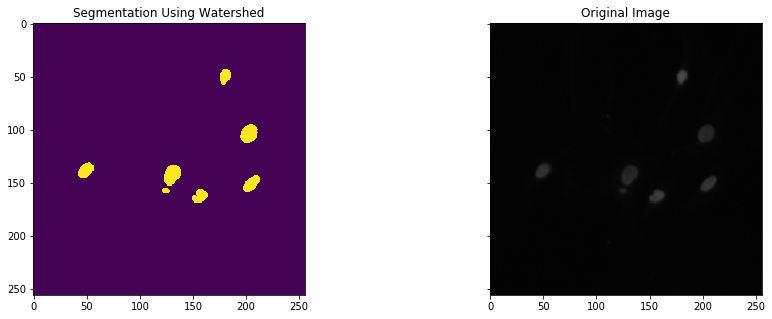

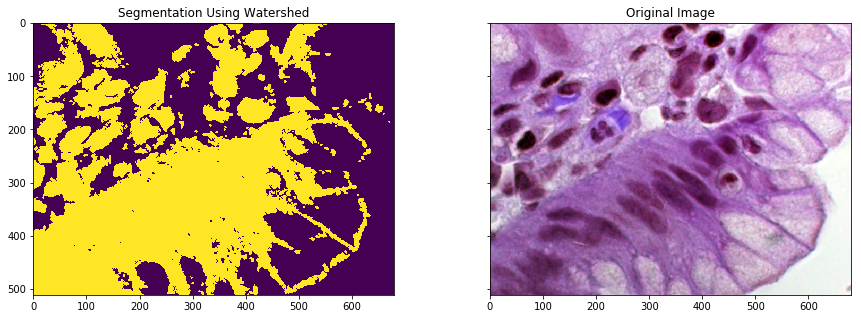

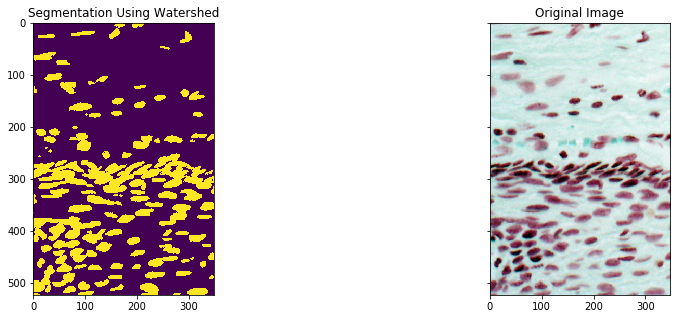

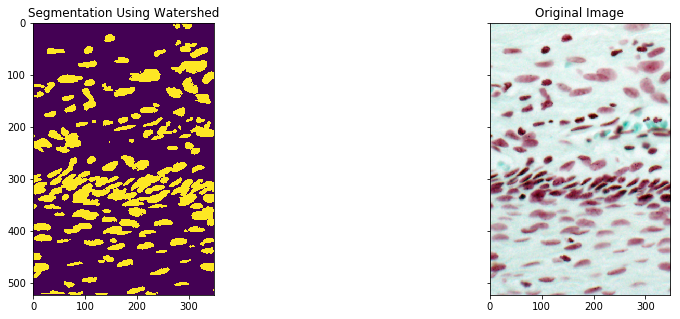

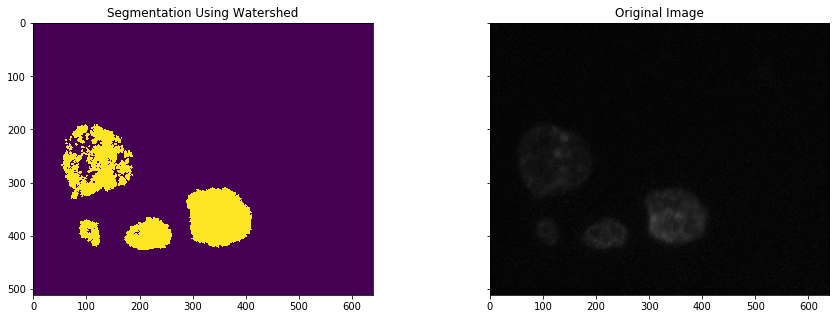

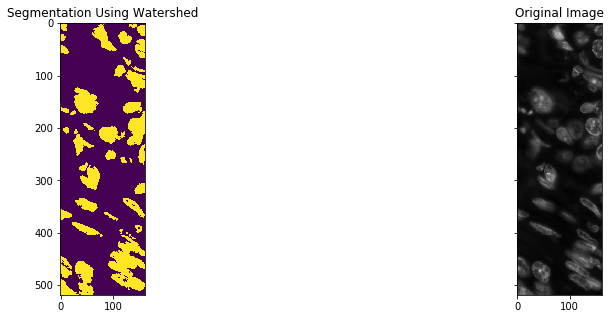

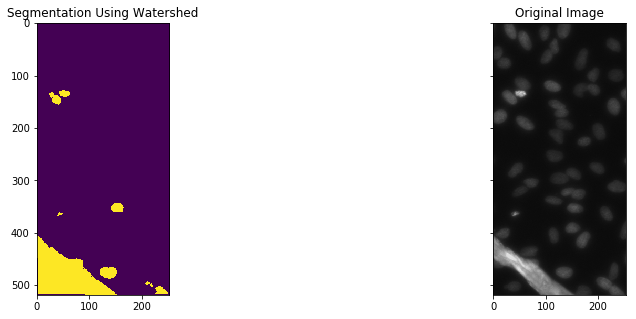

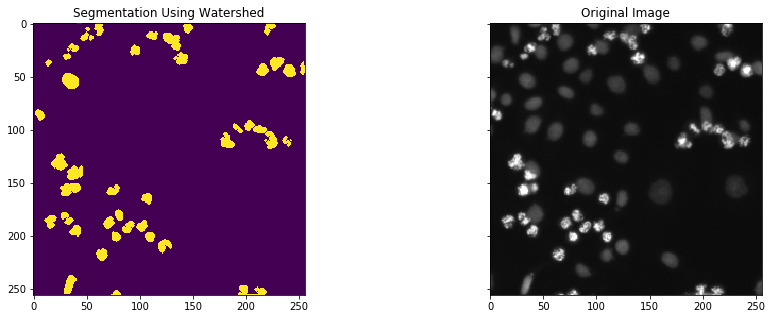

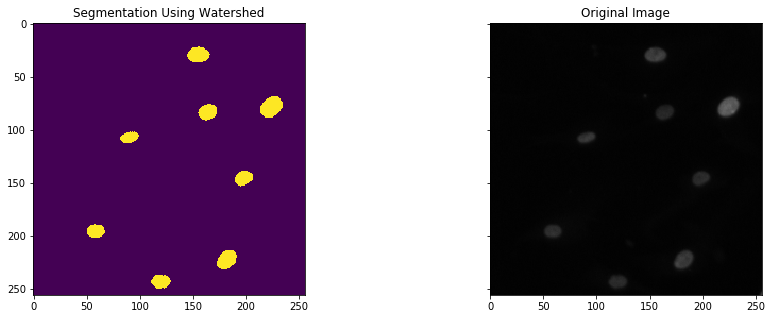

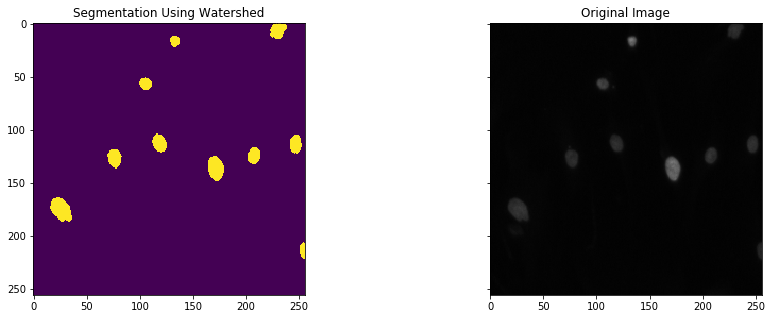

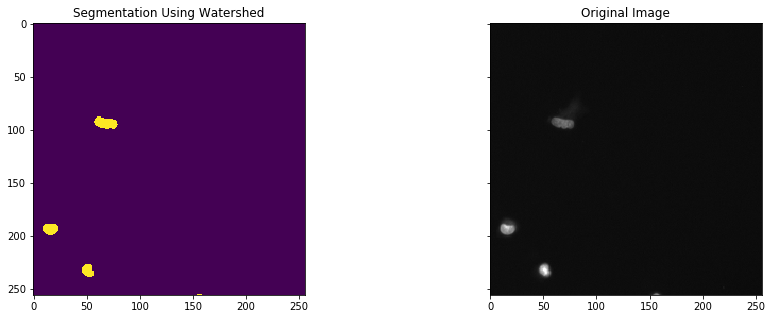

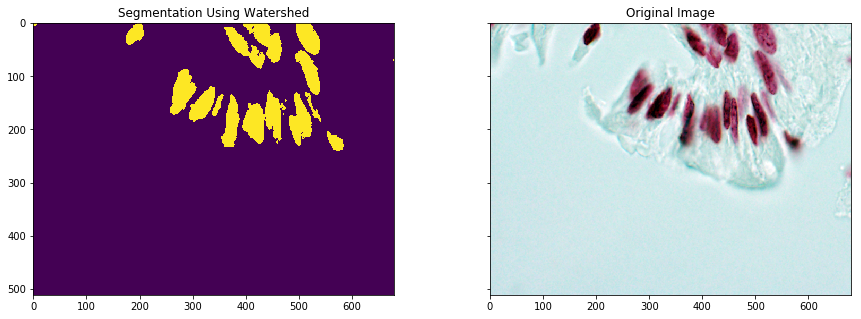

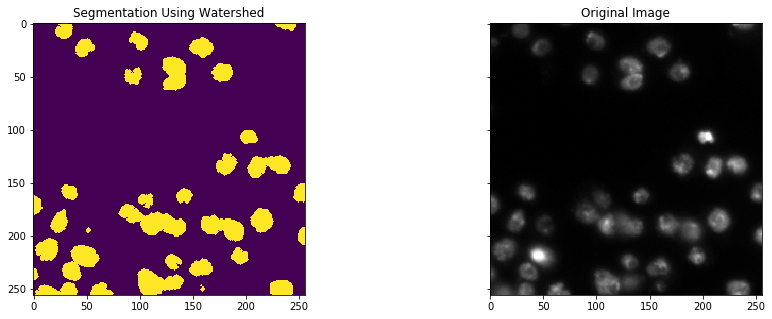

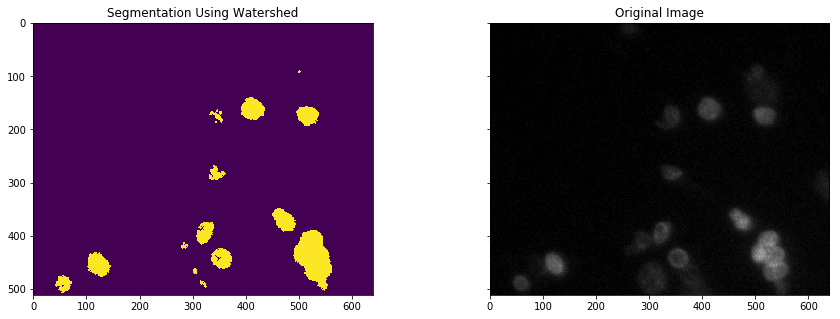

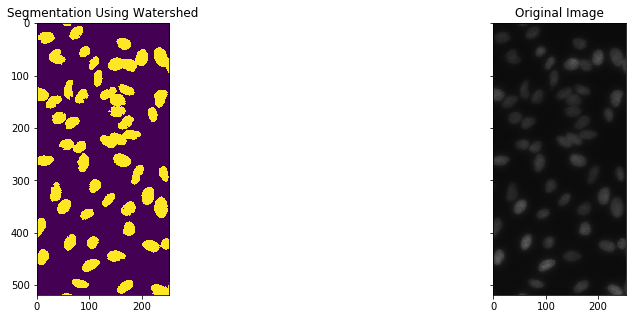

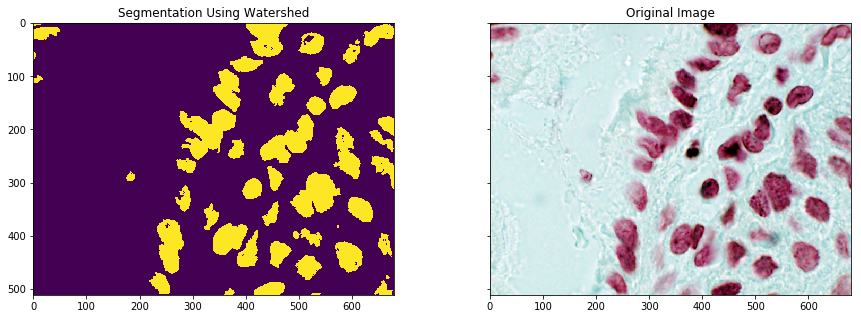

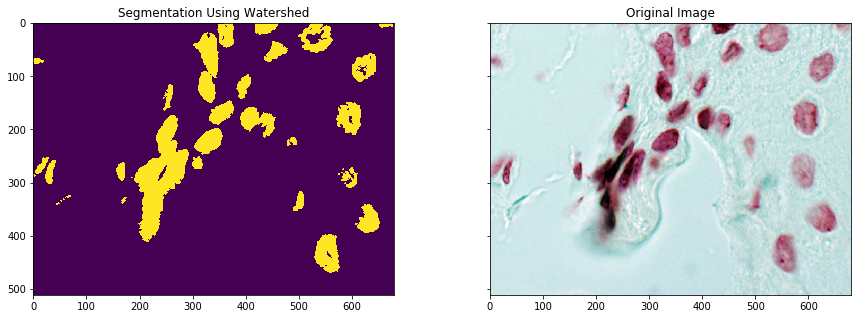

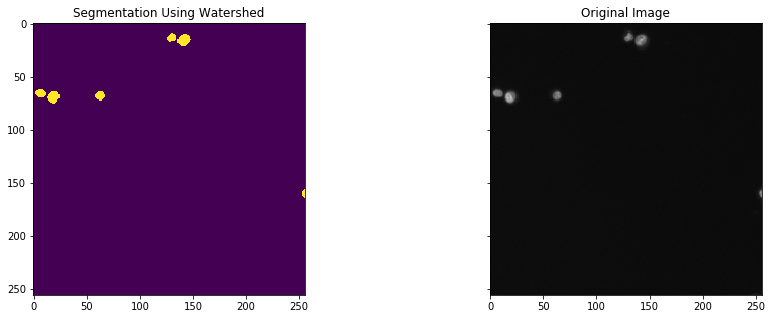

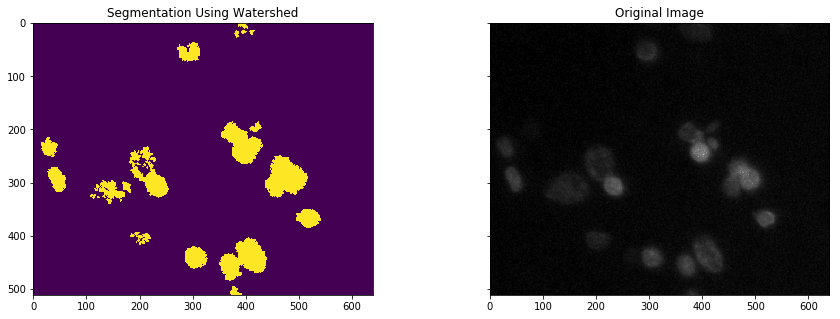

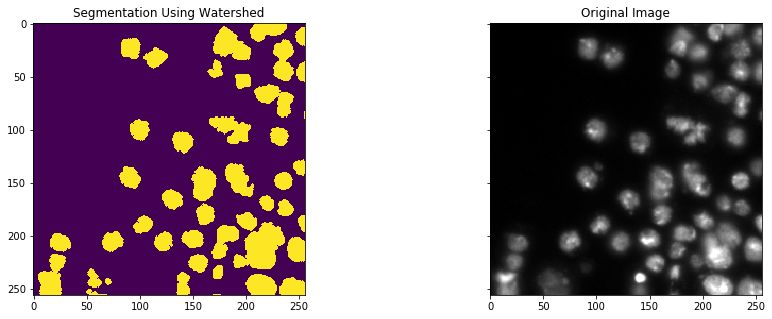

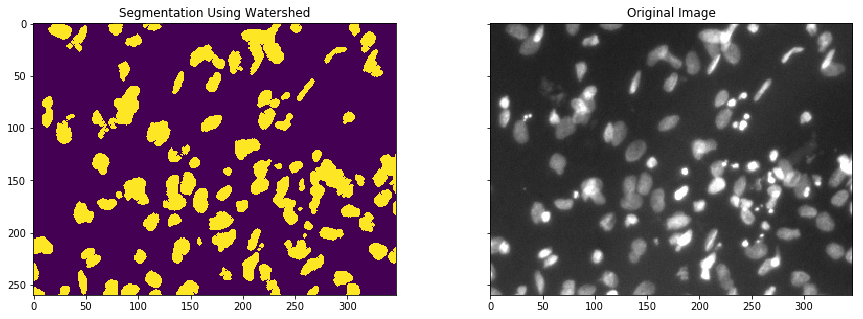

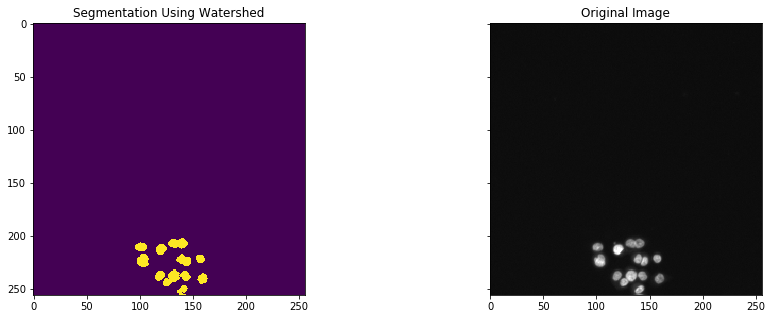

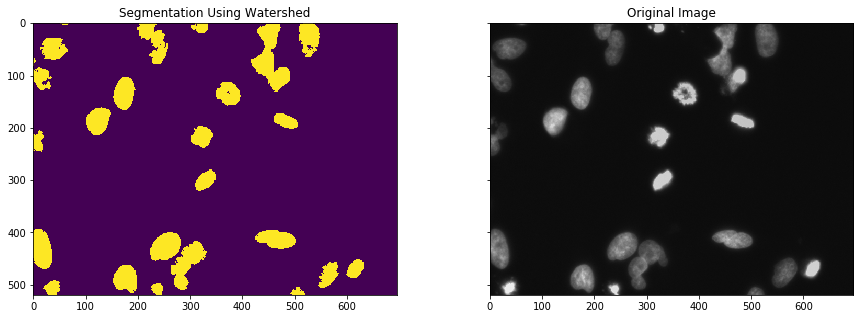

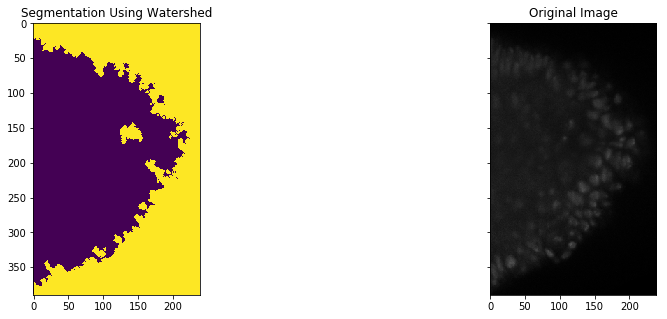

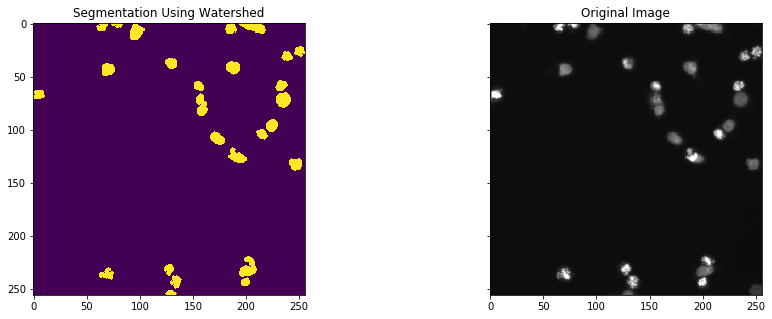

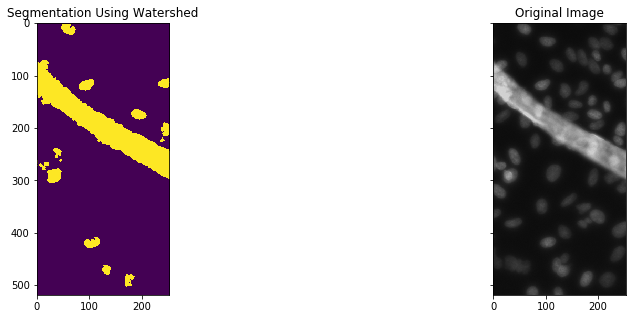

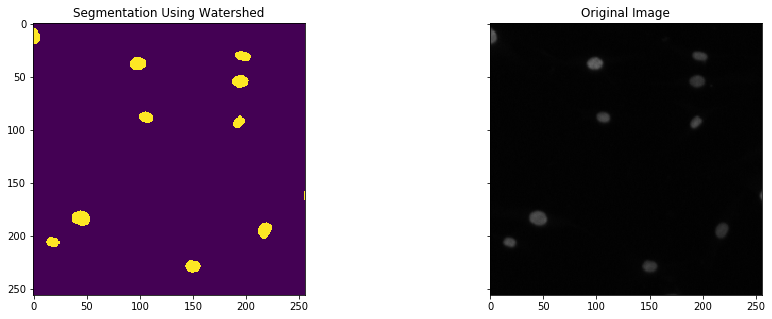

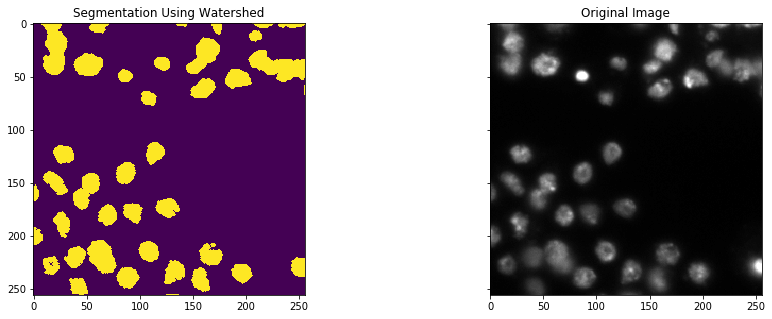

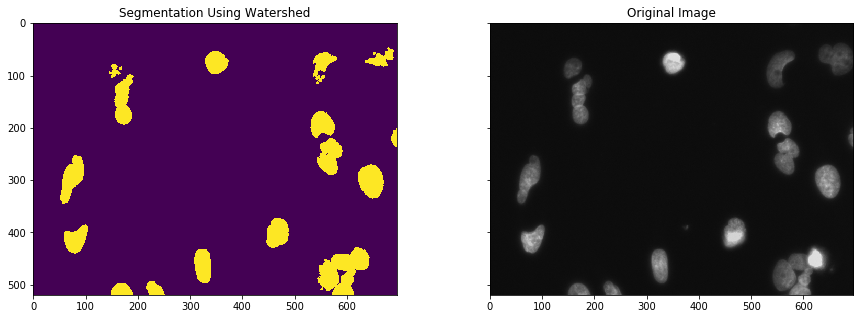

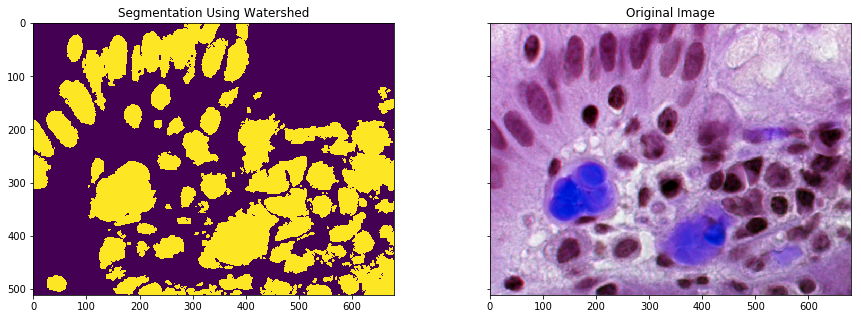

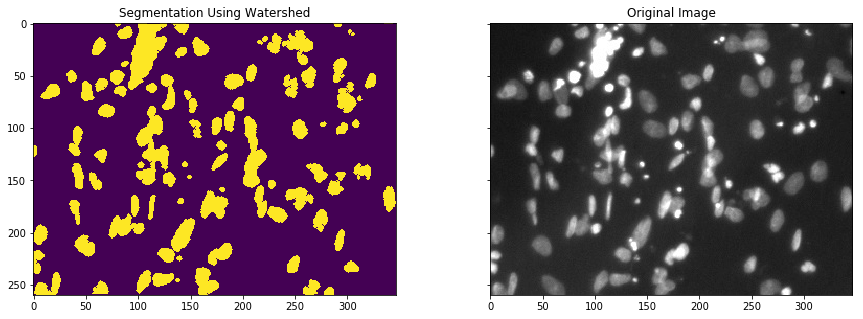

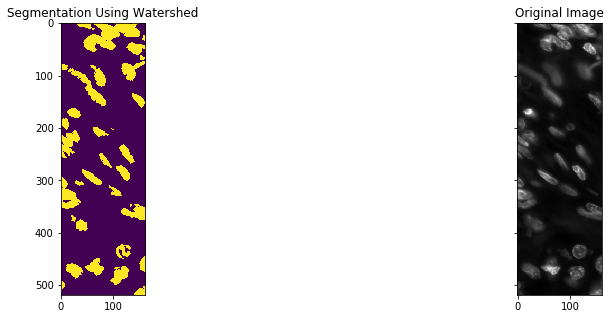

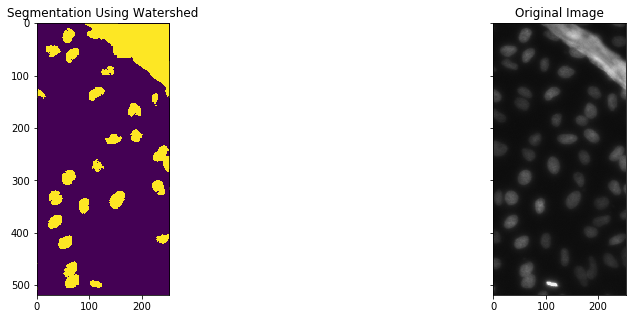

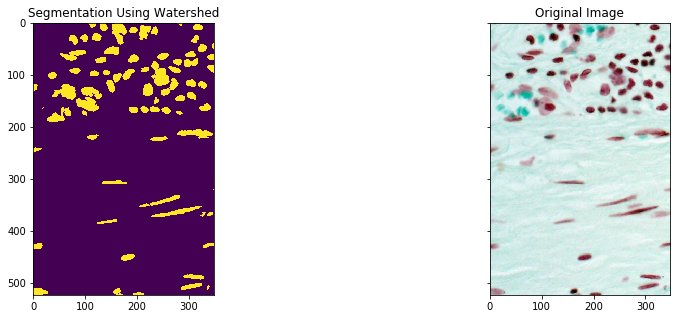

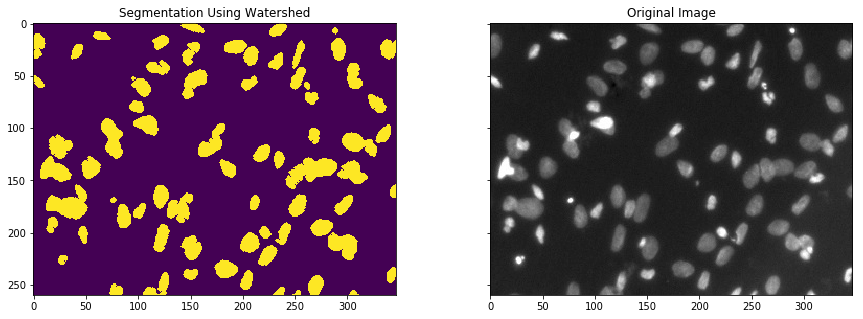

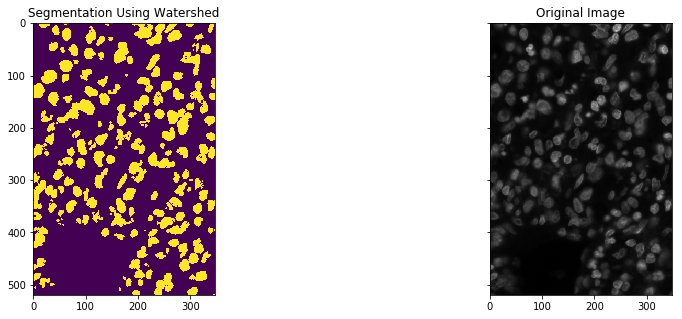

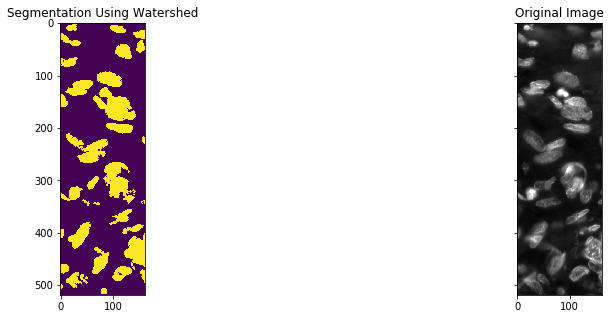

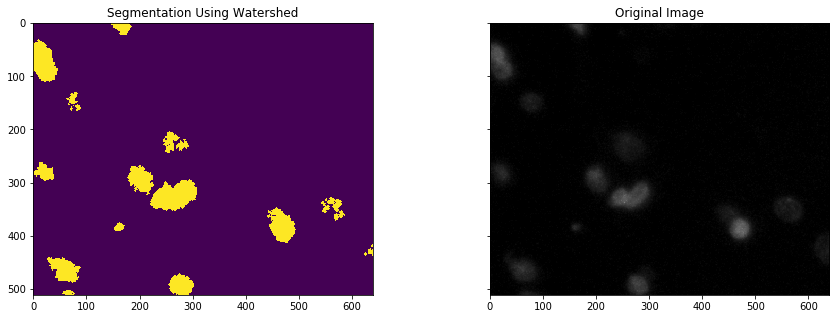

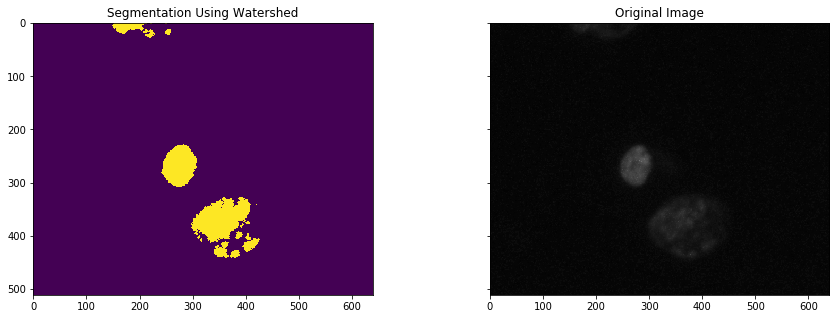

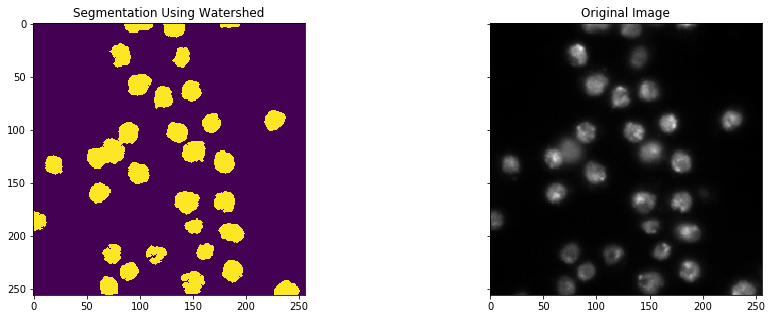

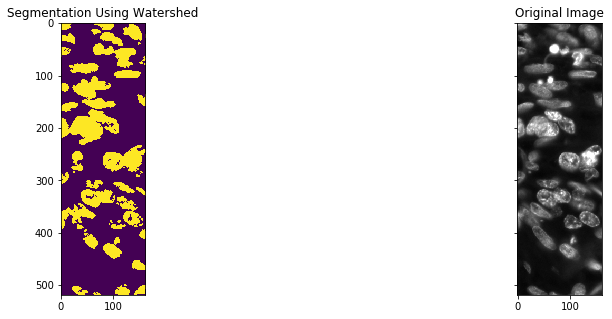

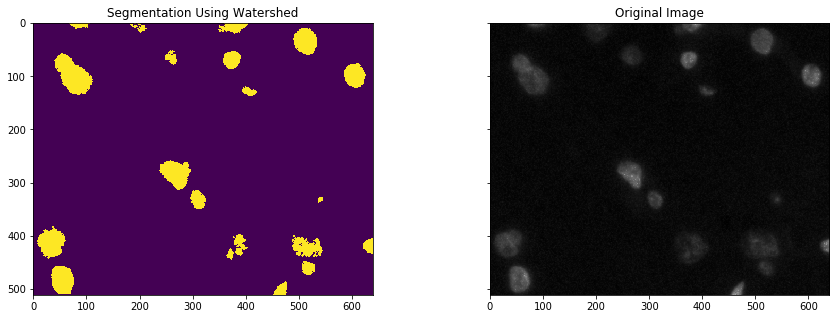

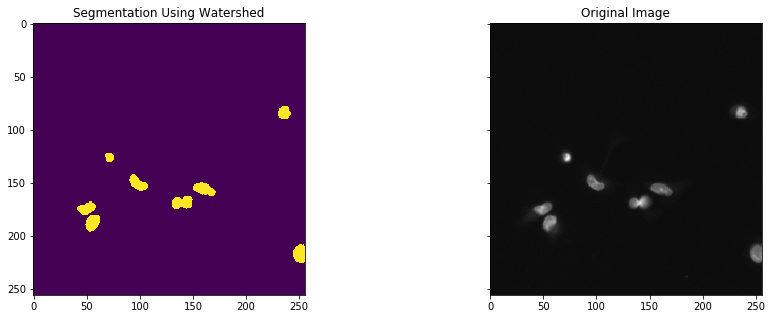

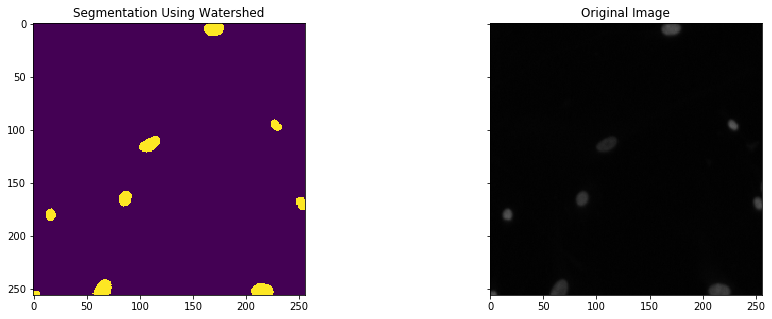

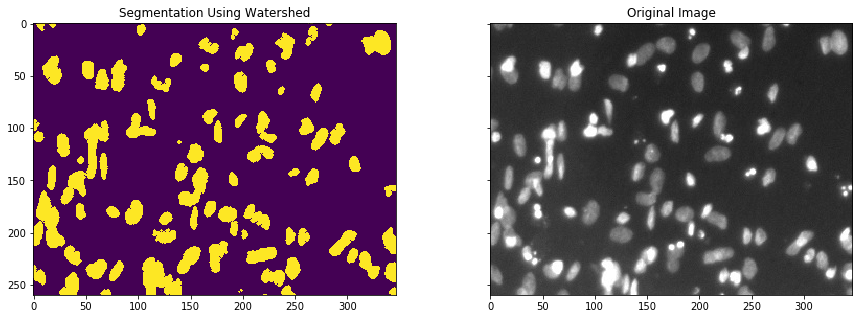

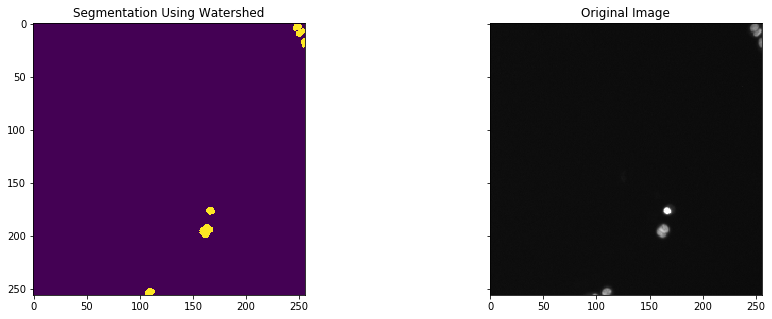

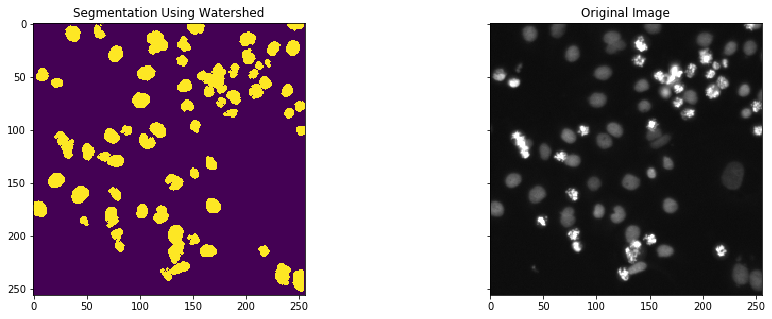

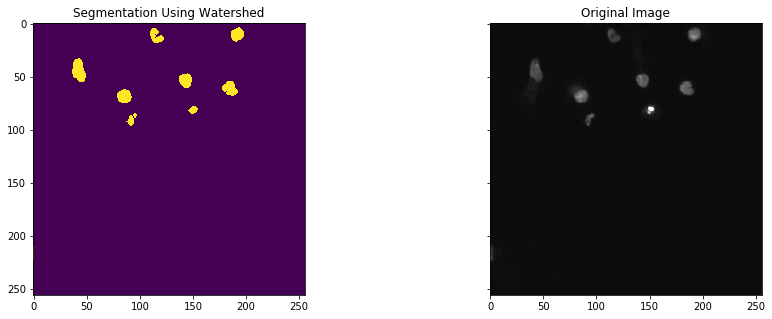

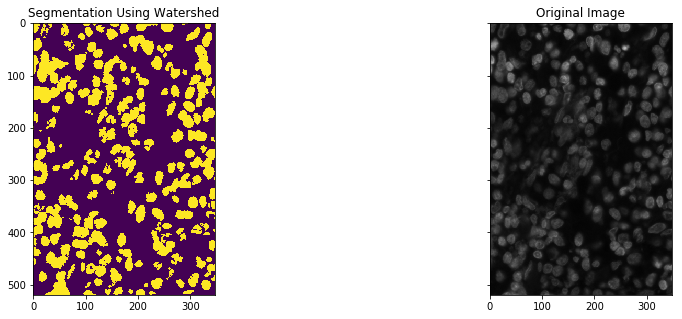

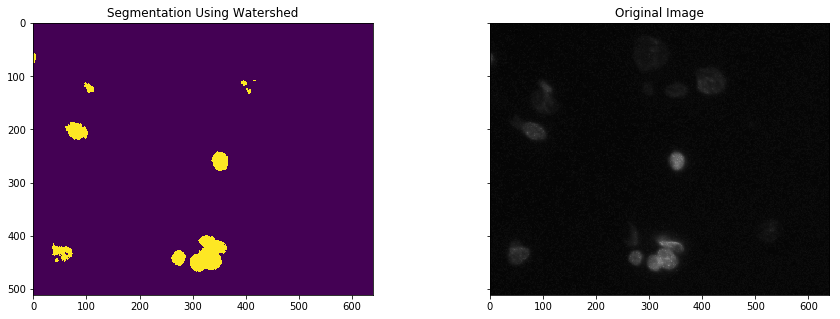

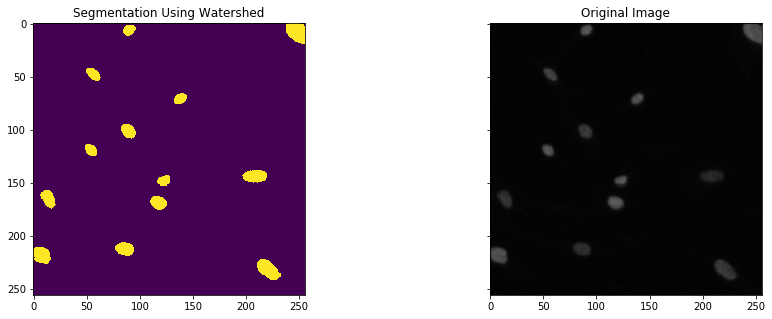

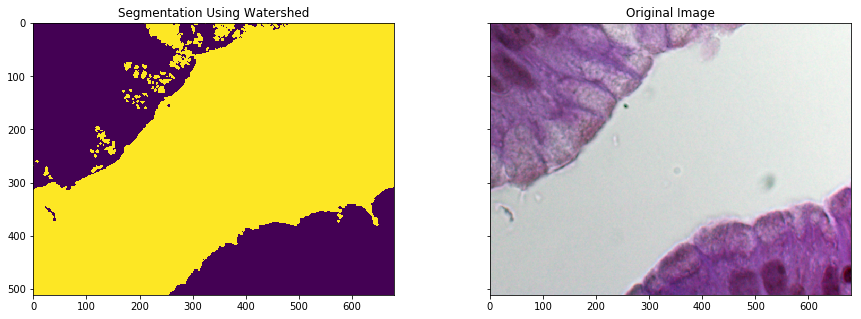

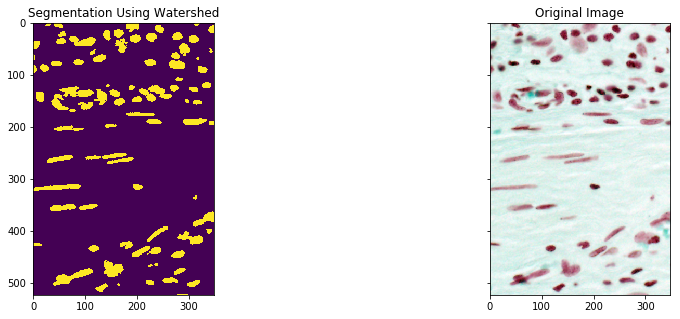

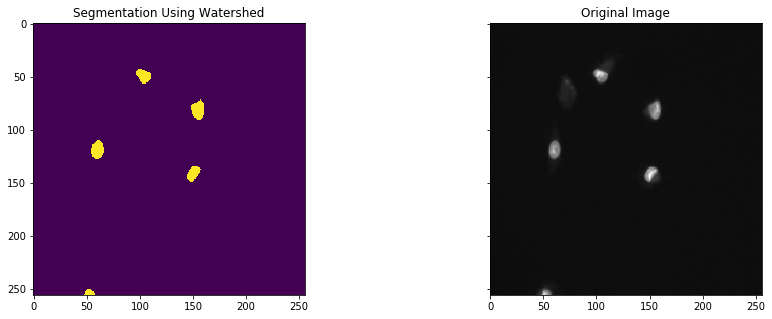

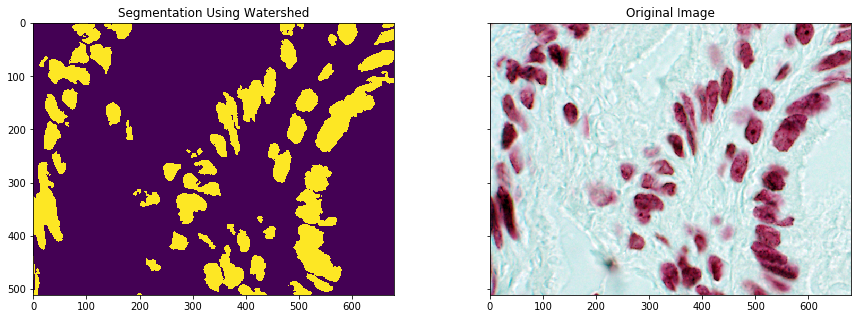

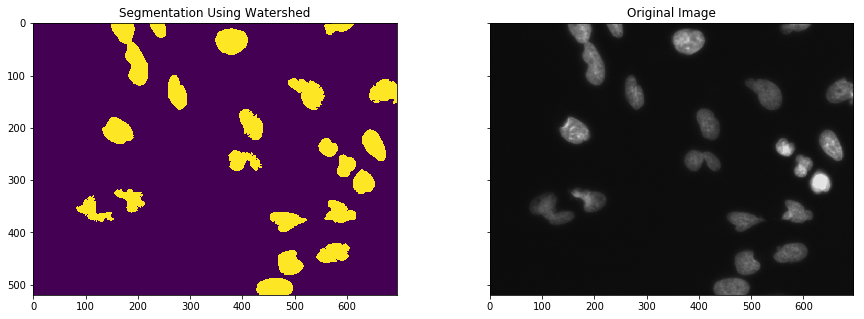

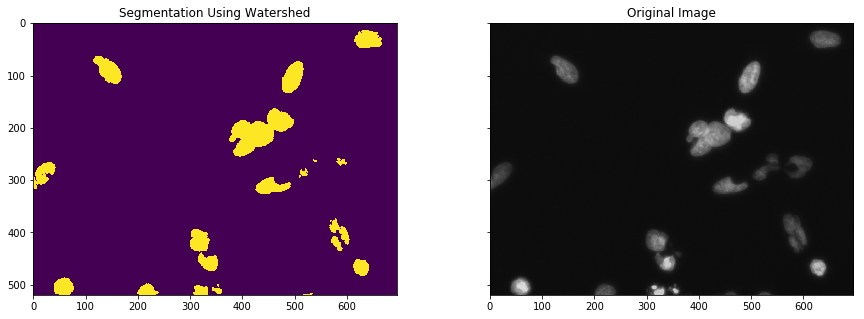

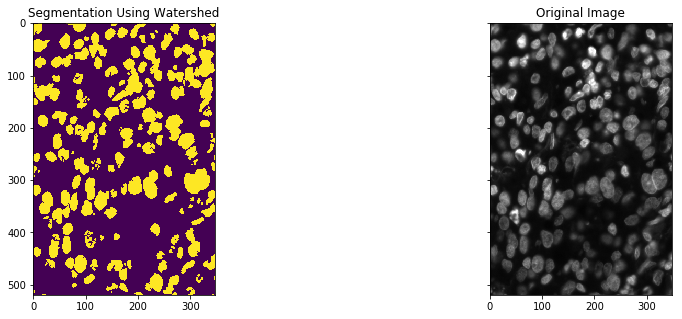

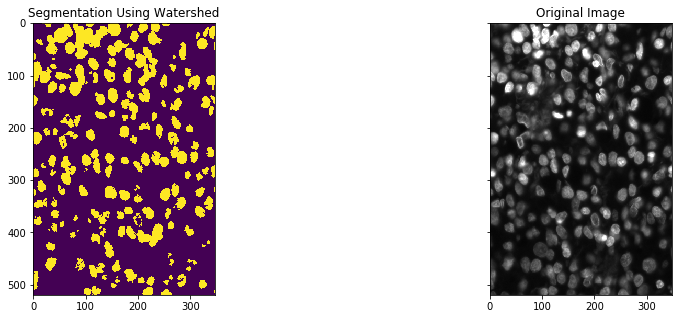

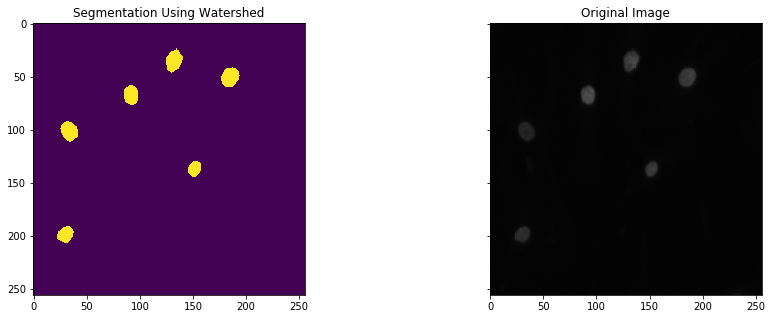

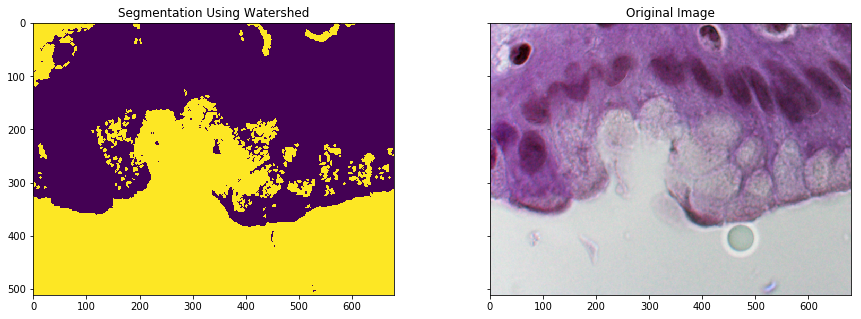

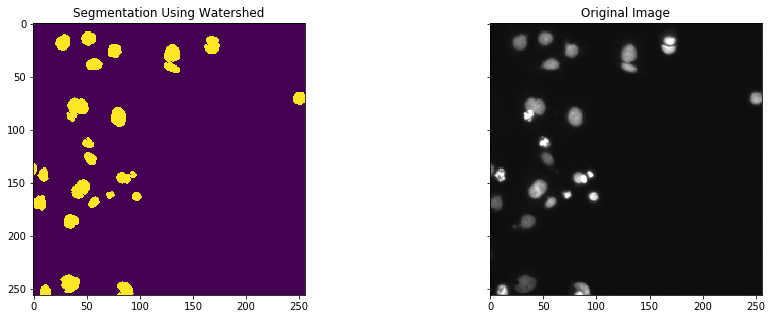

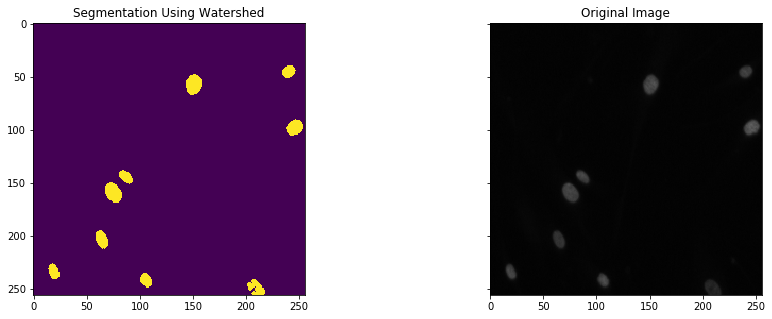

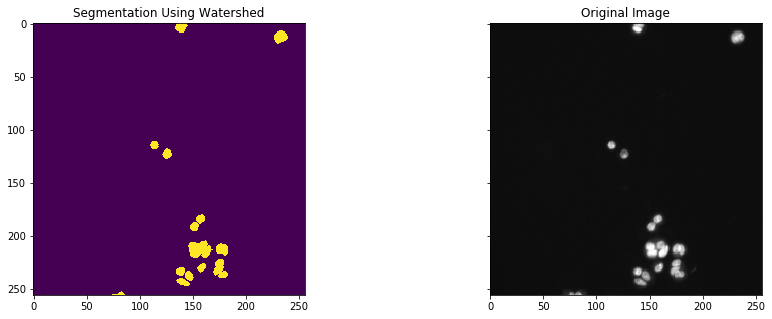

In [130]:
for originalImage in test_images:
    channel = checkPositiveStaining(originalImage)
    mask = generateMask(channel, originalImg = originalImage, fillHole = False, normalizeImg = False, 
                     plotProcess = False, plotResult = False, title = "Channel", 
                     useWatershed = True)
    labeledMask = skimage.measure.label(mask)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True, subplot_kw={'adjustable': 'box-forced'})
    ax = axes.ravel()
    ax[0].imshow(mask)
    ax[0].set_title("Segmentation Using Watershed")
    ax[1].imshow(originalImage)
    ax[1].set_title("Original Image")
    plt.show()

In [116]:
def process(originalImage):
    channel = checkPositiveStaining(originalImage)
    mask = generateMask(channel, originalImg = originalImage, fillHole = False, normalizeImg = False, 
                     plotProcess = False, plotResult = False, title = "Channel", 
                     useWatershed = True)
    labeledMask = skimage.measure.label(mask)
    return labeledMask

In [117]:
def rle_encoding(labeledMask):
    numNuclei = list(np.unique(labeledMask))
    numNuclei.remove(0)
    RLEs = []
    for v in numNuclei:
            dots = np.where(labeledMask.T.flatten() == v)[0]
            run_lengths = []
            prev = -2
            for b in dots:
                if (b>prev+1):
                    run_lengths.extend((b + 1, 0))
                run_lengths[-1] += 1
                prev = b
            RLEs.append(run_lengths)
    return RLEs

In [123]:
test_connected_components = [process(img) for img in test_images]
test_RLEs = [rle_encoding(labeledMask) for labeledMask in test_connected_components]

In [124]:
with open("submission_watershed_v2.csv", "wb") as myfile:
    myfile.write("ImageId,EncodedPixels\n")
    for i in range(len(test_dirs)):
        labeledMask = test_connected_components[i]
        RLEs = rle_encoding(labeledMask)
        print test_dirs[i]
        print len(RLEs)
        for RLE in RLEs:
            myfile.write(test_dirs[i]+","+" ".join([str(j) for j in RLE])+"\n")        

9ab2d381f90b485a68b82bc07f94397a0373e3215ad20935a958738e55f3cfc2
2
0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5
7
0f1f896d9ae5a04752d3239c690402c022db4d72c0d2c087d73380896f72c466
192
b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3
109
3c4c675825f7509877bc10497f498c9a2e3433bf922bd870914a2eb21a54fd26
118
1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b
37
1962d0c5faf3e85cda80e0578e0cb7aca50826d781620e5c1c4cc586bc69f81a
59
eea70a7948d25a9a791dbcb39228af4ea4049fe5ebdee9c04884be8cca3da835
9
fe9adb627a6f45747c5a8223b671774791ededf9364f6544be487c540107fa4f
41
191b2b2205f2f5cc9da04702c5d422bc249faf8bca1107af792da63cccfba829
8
519dc0d672d1c295fc69b629af8721ccb1a1f136d1976685a68487e62547ffe0
11
648c8ffa496e1716017906d0bf135debfc93386ae86aa3d4adbda9a505985fd9
4
f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb
20
4be73d68f433869188fe5e7f09c7f681ed51003da6aa5d19ce368726d8e271ee
33
8922a6ac8fd0258ec27738ca101867169b20d90a60fc84f93d